# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# To see whole data on screen.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format # set it to convert scientific values

In [2]:
# Regular expressions for string manipulation
import re

In [3]:
# to Ignore warnings during exicution of program.
import warnings
warnings.filterwarnings('ignore')

# Loading Data File

In [4]:
# Loading the dataframe and assigning it to a variable for quick accessment and ease in manipulation.
df =  pd.read_csv('loan.csv')

In [5]:
# Checking the loaded Data_frame
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [89]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,year,month,loan_amnt_slabs,annual_inc_slabs,int_rate_slabs,dti_slabs
0,1077501,5000,5000,4975.00,36 months,10.65,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,Jan-85,1,3,0,13648,83.70,9,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,2011,12,0-7000,20000-40000,10-12.5,NaN
1,1077430,2500,2500,2500.00,60 months,15.27,C,C4,1,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,Apr-99,5,3,0,1687,9.40,4,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,2011,12,0-7000,20000-40000,12.5-16,0-5
2,1077175,2400,2400,2400.00,36 months,15.96,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,Nov-01,2,2,0,2956,98.50,10,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,2011,12,0-7000,0-20000,12.5-16,05-10
3,1076863,10000,10000,10000.00,36 months,13.49,C,C1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,Feb-96,1,10,0,5598,21.00,37,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,2011,12,7000-14000,40000-60000,12.5-16,15-20
5,1075269,5000,5000,5000.00,36 months,7.90,A,A4,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,Nov-04,3,9,0,7963,28.30,12,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.00,2011,12,0-7000,20000-40000,0-10,10-15


In [91]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

# Pre-Checks on Data_Frame

In [6]:
# To check shape of datatype for loan data
df.shape

(39717, 111)

In [7]:
# to get information about d_types which are preassigned to the desired data_frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
# Categorical columns
categorical_feats = df.dtypes[df.dtypes == "object"].index
print(df[categorical_feats].columns)
print("*"*127)
print("*"*127)
print("*"*127)
print("Number of Categorical features: ", len(categorical_feats))

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type'], dtype='object')
*******************************************************************************************************************************
*******************************************************************************************************************************
*******************************************************************************************************************************
Number of Categorical features:  24


In [9]:
#  Numerical columns
numerical_feats = df.dtypes[df.dtypes != "object"].index
print(df[numerical_feats].columns)
print("*"*127)
print("*"*127)
print("*"*127)
print("Number of Numerical features: ", len(numerical_feats))

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
      

In [10]:
# To check how many rows have all missing values
print("Total rows with missing values :", df.isnull().all(axis=1).sum())

Total rows with missing values : 0


In [11]:
# To check how many columns have all missing values
print("Total columns with missing values : ", df.isnull().all(axis=0).sum())

Total columns with missing values :  54


In [12]:
# To get the detailed overview on the whole data_frame.
df.describe(include = 'all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717,39717,39717.00,39717,39717,37258,38642,39717,39717.00,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717.00,39717.00,39717,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39667,39717.00,39717,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39646,39717.00,1140,39715,39661.00,0.00,39717.00,39717,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,1,39717,26527,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,2,106,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,Jun-16,May-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,39717,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,1125,10308,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,683131.91,850463.56,11219.44,10947.71,10397.45,NaN,NaN,324.56,NaN,NaN,NaN,NaN,NaN,68968.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.32,0.15,NaN,0.87,35.90,69.70,9.29,0.06,13382.53,NaN,22.09,NaN,51.23,50.99,12153.60,11

In [13]:
# To check null values in each column.
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


# Cleaning the Data

In [14]:
# Checking for duplicate rows in dataset based on id column.
# so, that we can identify that if someone took more than 1 loan.
dup= df[df.duplicated(['id'])]
dup

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


there is no duplicate row of same id.

In [15]:
# some of the accounts which are named as "current" are still open
# these accounts can't be of any use as their behaviour is still not decided.
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [16]:
# As we need to consider the people behaviour. So we have to drop data regarding to "current".
df.drop(df.loc[df['loan_status'] == "Current"].index, inplace=True)

In [17]:
# Calculation of null values and their percentage level in the 
def nan_counter(df):
    
    total = df.isnull().sum().sort_values(ascending=False)
    
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    
    missing_data = pd.concat([total, percent], axis=1, keys=['Total null', 'Percent'])
    
    print(missing_data)
    
nan_counter(df)

                                Total null  Percent
verification_status_joint            38577   100.00
annual_inc_joint                     38577   100.00
mo_sin_old_rev_tl_op                 38577   100.00
mo_sin_old_il_acct                   38577   100.00
bc_util                              38577   100.00
bc_open_to_buy                       38577   100.00
avg_cur_bal                          38577   100.00
acc_open_past_24mths                 38577   100.00
inq_last_12m                         38577   100.00
total_cu_tl                          38577   100.00
inq_fi                               38577   100.00
total_rev_hi_lim                     38577   100.00
all_util                             38577   100.00
max_bal_bc                           38577   100.00
open_rv_24m                          38577   100.00
open_rv_12m                          38577   100.00
il_util                              38577   100.00
total_bal_il                         38577   100.00
mths_since_r

In [18]:
# Removing columns where all values are null in sequence .
df.drop(df.iloc[:, 53:105], inplace = True, axis = 1) # dropping columns by selecting the index range.
# Checking null values in each column again after removing the columns in sequence.
#            df.isnull().sum()
# 52 columns remain, after (doing Hard Droping) removing columns with all null values.

In [19]:
# Columns which contain no value. Columns which are useless as per analysis point of view. 

df.drop([
         'tot_hi_cred_lim', # Total high credit/credit limit.
         'total_bc_limit', # Total bankcard high credit/credit limit.
         'total_bal_ex_mort', # Total credit balance excluding mortgage.
         'total_il_high_credit_limit', # Total installment high credit/credit limit.
         'mths_since_last_major_derog', # Months since most recent 90-day or worse rating.
         'out_prncp_inv', # Percent of trades never delinquent.
         'out_prncp', # Remaining outstanding principal for total amount funded.
        ], axis=1, inplace= True)

# df.isnull().sum() # to check null values in dataframe after removing null value columns.

In [20]:
# Removing columns which contain Partial null values. columns which are not useful as per analysis point of view. 

df.drop([
         'desc', # Loan description provided by the borrower,
         'tax_liens', # Number of tax liens.
         'emp_title', # The job title supplied by the Borrower when applying for the loan.*
         "next_pymnt_d", # Next scheduled payment date.
         'mths_since_last_delinq', # The number of months since the borrower's last delinquency.
         'mths_since_last_record' # The number of months since the last public record.
        ],axis=1 , inplace=True)

# df.isnull().sum() # to check the dataframe after removing those Partial null value columns.

In [21]:
# Removing columns which contain values in all cells, but still not useful as per analysis point of view.

df.drop([
         "url", # URL for the LC page with listing data.
         'member_id', # A unique LC assigned Id for the borrower member.
         'zip_code', # The first 3 numbers of the zip code provided by the borrower in the loan application.
         'collections_12_mths_ex_med', # Number of collections in 12 months excluding medical collections.
         'delinq_2yrs', # The number of 30+ days past-due incidences of delinquency in the borrower's credit file 
                        # for the past 2 years.
         'pymnt_plan', # Indicates if a payment plan has been put in place for the loan.
         'initial_list_status', # The initial listing status of the loan. Possible values are – W, F.
         'application_type',
         'policy_code',
         'installment'
        ], axis=1, inplace = True)

# df.isnull().sum()

In [22]:
# creating month and year columns separately which are derived from existing column "issue_d", 
# As ,it may come in use for further analysis.

df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y') # specifying the format of date present in that specific column
df['year']=df['issue_d'].dt.year # taking out year from date format and assigning it to "year" column.
df['month']=df['issue_d'].dt.month # taking out month from date format and assigning it to "month" column.

# Checking out the new columns we assigned. 
df.head(1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.00,36 months,10.65%,B,B2,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,Jan-85,1,3,0,13648,83.70%,9,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,2011,12


In [23]:
# Checking data shape after dropping and adding some columns . 
df.shape

(38577, 38)

In [24]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
print(df[numerical_feats].columns)
print("*"*127)
print("*"*127)
print("*"*127)
print("Number of Numerical features: ", len(numerical_feats))

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'issue_d', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies', 'year', 'month'], dtype='object')
*******************************************************************************************************************************
*******************************************************************************************************************************
*******************************************************************************************************************************
Number of Numerical features:  23


In [25]:
categorical_feats = df.dtypes[df.dtypes == "object"].index
print(df[categorical_feats].columns)
print("*"*127)
print("*"*127)
print("*"*127)
print("Number of Categorical features: ", len(categorical_feats))

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'title', 'addr_state', 'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d'], dtype='object')
*******************************************************************************************************************************
*******************************************************************************************************************************
*******************************************************************************************************************************
Number of Categorical features:  15


After basic cleaning, we are left with 38 columns

# Replacing NA/ Null Values with Suitable Values.

In [26]:
# 1.) For 'emp_length' Column.
# As it has largest number of columns with null values as 1075 columns.
# but firsty, checking Unique Values and their count in the whole column.
df['emp_length'].value_counts() 
# NA values can't be seen in it. 

# Also,Employment length column can have numbers onlyin it. 
# As it could be helpful for further analysis.

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [27]:
# Replacing "NA values" with 0 to make it useful for further analysis.  
df.emp_length.fillna('0',inplace=True) 
# we replaced NA with 0 here because,
# we can see that more than 10 years already have different identifier as 10+ years. 
# So, NA defines no value that's why i replaced null values columns with 0.
# Also Extracting out numeric values from string and placing it back in the same column.
df['emp_length'] = df.emp_length.str.replace(r'\D+', '')

# and to change the datatype of the column. 
df['emp_length'] = df['emp_length'].apply(pd.to_numeric) # As this column will have only numeric values in it.

#Checking the Data frame  again
df.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.00,36 months,10.65%,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,Computer,AZ,27.65,Jan-85,1,3,0,13648,83.70%,9,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,2011,12
1,1077430,2500,2500,2500.00,60 months,15.27%,C,C4,1,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,Apr-99,5,3,0,1687,9.40%,4,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,2011,12
2,1077175,2400,2400,2400.00,36 months,15.96%,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,IL,8.72,Nov-01,2,2,0,2956,98.50%,10,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,2011,12
3,1076863,10000,10000,10000.00,36 months,13.49%,C,C1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,Feb-96,1,10,0,5598,21%,37,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,2011,12
5,1075269,5000,5000,5000.00,36 months,7.90%,A,A4,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,Nov-04,3,9,0,7963,28.30%,12,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.00,2011,12


In [28]:
# For 'pub_rec_bankruptcies' columnas. 
# Now it has the large amount of Null Values in it, as  697 cells.
df['pub_rec_bankruptcies'].value_counts() # To check the identifiers used in this column.

0.00    36238
1.00     1637
2.00        5
Name: pub_rec_bankruptcies, dtype: int64

In [29]:
# Replacing Null values with Unknown.
# So that, cells with no values will also be recognisable while analysis.
df.pub_rec_bankruptcies.fillna('Unknown',inplace=True)

### Changing column data type

In [30]:
# Removing (%) symbol from intrest rate column so that it can become useful for further calculation purpose.
df['int_rate'] = df['int_rate'].str.rstrip('%')
# Changing the DataType of the Column Object to Numeric.
df['int_rate'] = df['int_rate'].apply(pd.to_numeric)


# Removing (%) symbol from intrest rate column so that it can become useful for further calculation purpose.
df['revol_util'] = df['revol_util'].str.rstrip('%')
# Changing the DataType of the Column Object to Numeric.
df['revol_util'] = df['revol_util'].apply(pd.to_numeric)


### Quantitative Corelations

In [31]:
# creating a new df that has only numerical columns
df_num = df.select_dtypes(include=['float64','int64'])

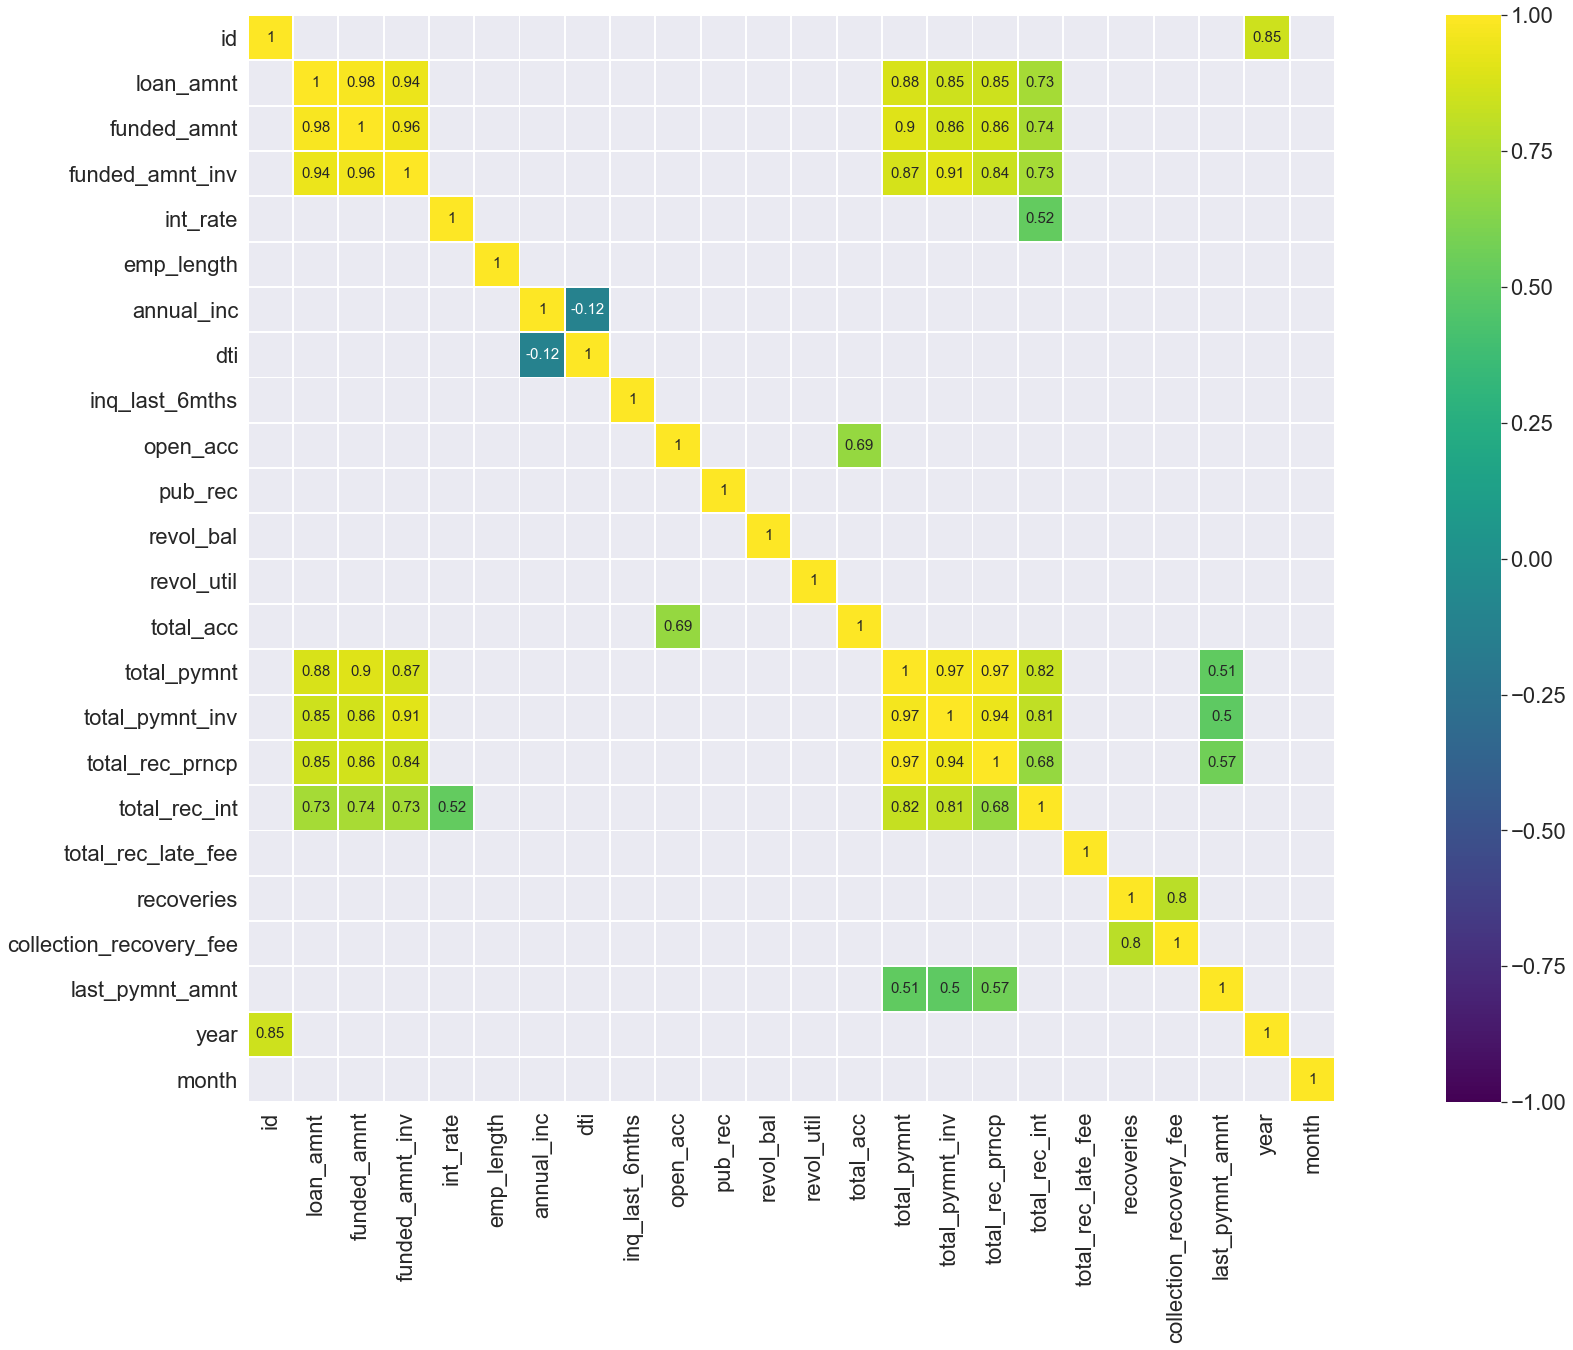

In [32]:
# naive way 
corr = df_num.corr()
sns.set(font_scale=2)
# corr
plt.figure(figsize=(40, 20))


sns.heatmap(corr[(corr >= 0.5)| (corr <= -0.1)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths = 1,
            annot=True, annot_kws={"size": 15}, square=True);

In [33]:
df_num_corr = df_num.corr()['loan_amnt'][:-1]
best_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)

print("There are {} strongly correlated values with loan amount:\n{}".format(len(best_features_list), best_features_list))

There are 7 strongly correlated values with loan amount:
loan_amnt         1.00
funded_amnt       0.98
funded_amnt_inv   0.94
total_pymnt       0.88
total_pymnt_inv   0.85
total_rec_prncp   0.85
total_rec_int     0.73
Name: loan_amnt, dtype: float64


### Observation are :-

1.) Loan amount, investor amount & funding amount are strongly correlated.

2.) Annual income with DTI(Debt-to-income ratio) is negatively correalted.

Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts.
That means when annual income is low DTI is high & vice versa.

3.) Weak but Positive correlation between annual income and employment years.That means income increases with work experience.

### Univariate Analysis  

Taking **Observations** on some columns which are independent, to find some relative data to get better insights from them.

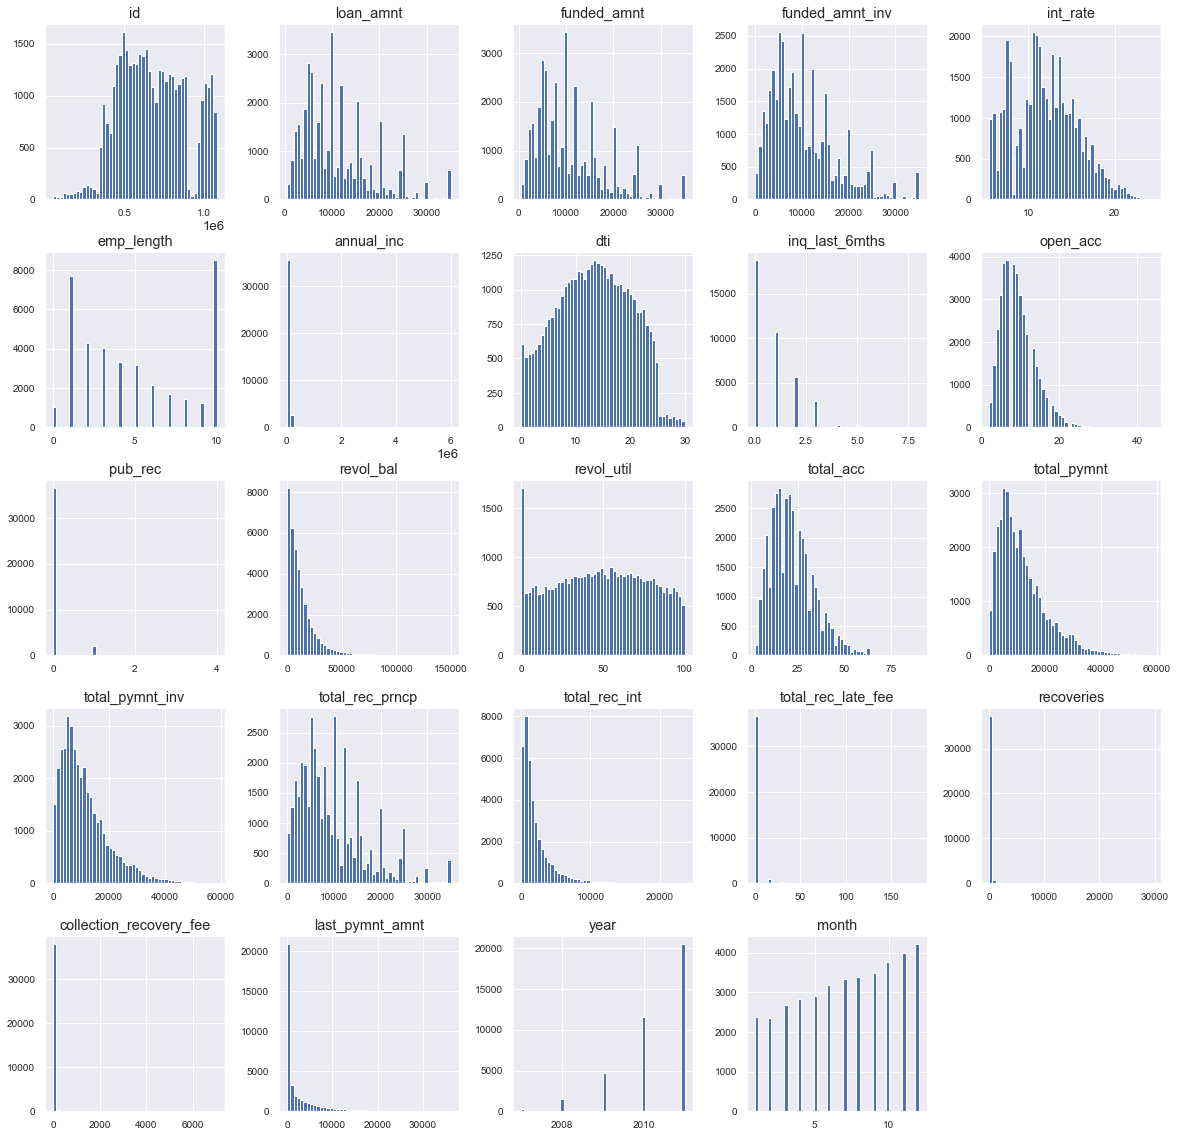

In [34]:
# df_num.describe()
sns.set(font_scale=1.2)
df_num.hist(figsize=(20, 20), bins= 50, xlabelsize= 10, ylabelsize=10);

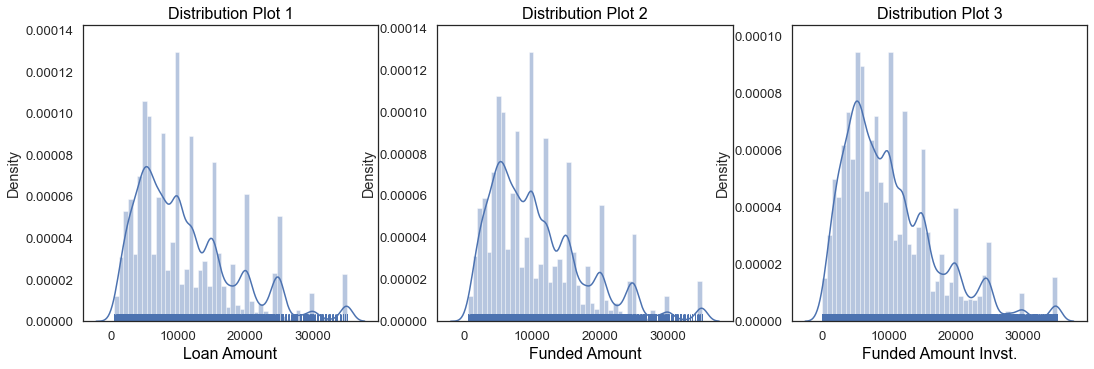

In [35]:
# Quantitative Variables.

# Distribution of three amount variables by using "Distribution Plot".
sns.set(font_scale= 1.2)
plt.figure(figsize=(18,12),facecolor='white')
sns.set_style("white")

# Plot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(df['loan_amnt'],rug = True)
ax.set_title('Distribution Plot 1',fontsize= 16,color='BLACK')
ax.set_xlabel('Loan Amount',fontsize=16,color='black')

# Plot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(df['funded_amnt'],rug = True)
ax.set_title('Distribution Plot 2',fontsize=16,color='black')
ax.set_xlabel('Funded Amount',fontsize = 16,color='black')

# Plot 3
plt.subplot(2, 3, 3)
ax = sns.distplot(df['funded_amnt_inv'],rug = True)
ax.set_title('Distribution Plot 3',fontsize=16,color='black')
ax.set_xlabel('Funded Amount Invst.',fontsize=16,color='black')

plt.show()

#### Observation :- 
After plotting, distribution of amounts for all three looks very much similar.
So,We will work only with loan amount column for rest of our analysis. 
As this is the column which reflets the amount which is lended to the people by the company.

In [36]:

df.shape

(38577, 38)

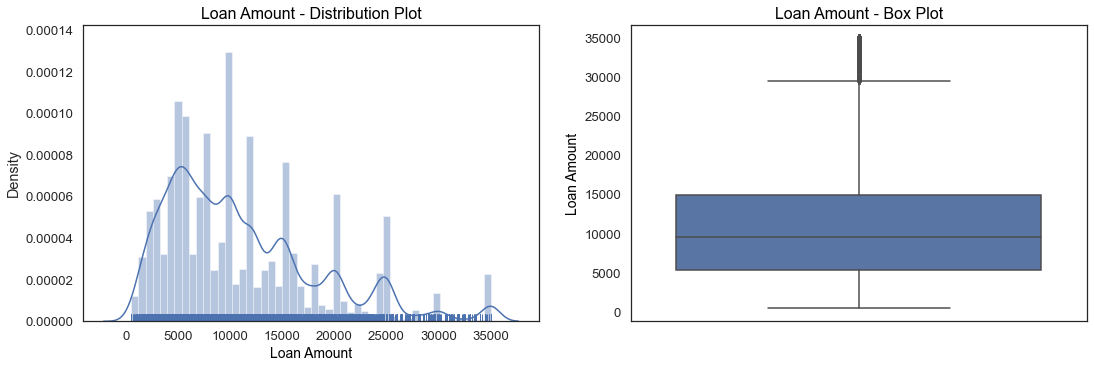

In [37]:
# Univariate Analysis on Loan amount (Quantitative Variable)

sns.set(font_scale= 1.2)
plt.figure(figsize=(18,12),facecolor='white')
sns.set_style("white")


# distribution plot
plt.subplot(2, 2, 1)
ax = sns.distplot(df['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='black')
ax.set_xlabel('Loan Amount',fontsize=14,color='black')

# box plot
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='black')
ax.set_ylabel('Loan Amount',fontsize=14,color='black')
plt.show()

In [38]:
# On important column 'loan_amt', we observed average amounts of loan taken by people from the company.  
df['loan_amnt'].describe()

count   38577.00
mean    11047.03
std      7348.44
min       500.00
25%      5300.00
50%      9600.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

#### Observation :-
The plots show that most of the Loan amounts are in range of 5000 - 15000

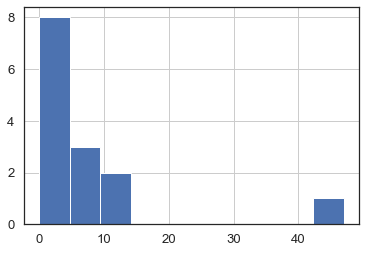

In [39]:
# important column is "purpose" of loan in total loans issued.
# This would define us the actual purpose of the peole who took loan from this company. 
round((df.purpose.value_counts()*100)/len(df)).hist();

In [40]:
# Looking on percentage of value for each column
round((df.purpose.value_counts()*100)/len(df))

debt_consolidation   47.00
credit_card          13.00
other                10.00
home_improvement      7.00
major_purchase        6.00
small_business        5.00
car                   4.00
wedding               2.00
medical               2.00
moving                1.00
vacation              1.00
house                 1.00
educational           1.00
renewable_energy      0.00
Name: purpose, dtype: float64

#### Observations are:-

1.) Most common purpose of taking loans by people were 

    a) for debt consolidation (47%)  

    b) for Credit card (13%)


2.) Other (10%) & Home improvement (7%) were also some areas for which loans were taken.

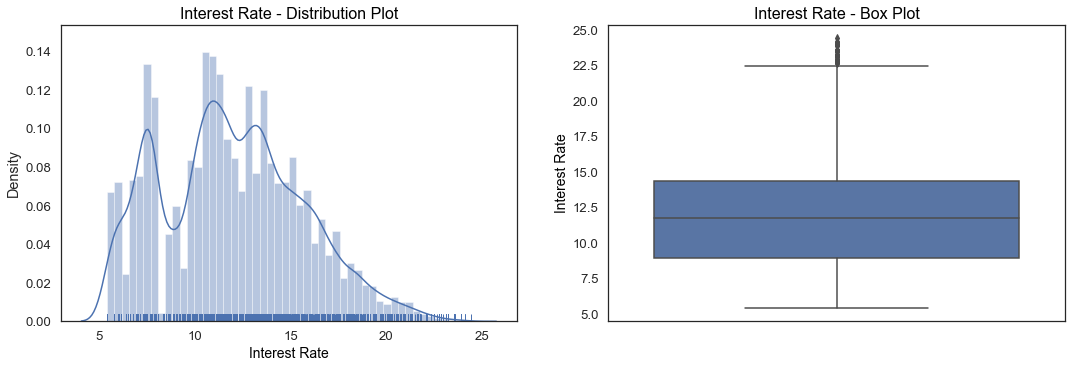

In [41]:
# Univariate Analysis on Intrest Rate (Quantitative Variable)

sns.set(font_scale= 1.2)
plt.figure(figsize=(18,12),facecolor='white')
sns.set_style("white")

# plot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='black')
ax.set_xlabel('Interest Rate',fontsize=14,color='black')

# plot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='black')
ax.set_ylabel('Interest Rate',fontsize=14,color='black')
plt.show()

In [42]:
# On column 'int_rate'. 
# By this variable, we tried to observe values related to intrest rates on loan taken by peoples.
df['int_rate'].describe()

count   38577.00
mean       11.93
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.38
max        24.40
Name: int_rate, dtype: float64

**Observation**

1) For most of the people who took loan, the average intrest rate was 12 % (in range of **9.25% to 14.54%**)

2) For some people who were falling out of 75% percentile. **interest rate was raised to 25% from 15%** which is a huge jump of 10%.

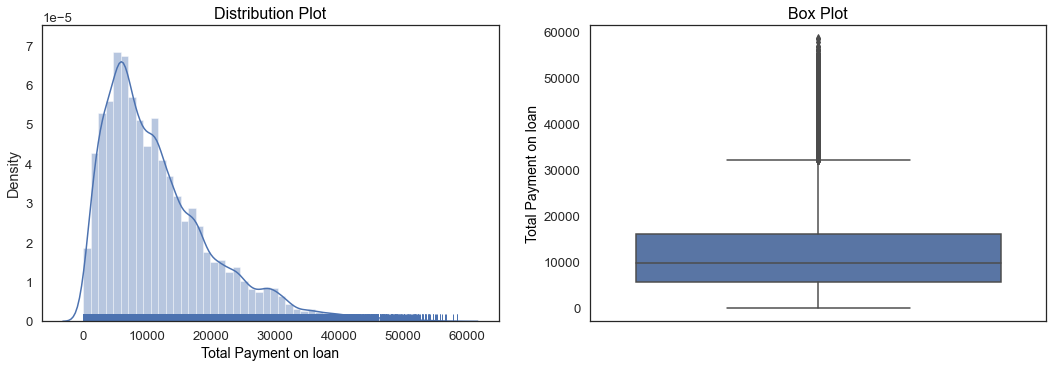

In [43]:
# checking the spread of values in total payment on loan. (Quantitative Variable)

sns.set(font_scale= 1.2)
plt.figure(figsize=(18,12),facecolor='white')
sns.set_style("white")

# plot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df['total_pymnt'],rug = True)
ax.set_title('Distribution Plot',fontsize=16,color='black')
ax.set_xlabel('Total Payment on loan',fontsize=14,color='black')

# plot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df['total_pymnt'])
ax.set_title('Box Plot',fontsize=16,color='black')
ax.set_ylabel('Total Payment on loan',fontsize=14,color='black')
plt.show()

In [44]:
# On column 'total_pymnt' we observed average payment done by people to the company.
df.total_pymnt.describe()

count   38577.00
mean    11866.97
std      8809.86
min         0.00
25%      5513.50
50%      9674.05
75%     16136.95
max     58563.68
Name: total_pymnt, dtype: float64

#### Observation :-
Most of the payment on loan were in between the range of 5500 to 16000. But for some values, still it hikes to 58500.

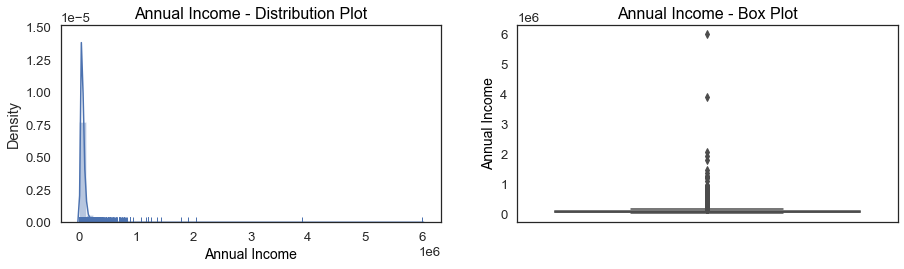

In [45]:
# Univariate Analysis on Annual Income of Borrower (Quantitative Variable)
# We are observing annual incomes of people who were eligible to take loan from the company.

sns.set(font_scale= 1.2)
plt.figure(figsize=(15,8),facecolor='white')
sns.set_style("white")

# plot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='black')
ax.set_xlabel('Annual Income',fontsize=14,color='black')

# plot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=df['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='black')
ax.set_ylabel('Annual Income',fontsize=14,color='black')
plt.show()

In [46]:
# to check the outliers in it.
df['annual_inc'].describe()

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64

In this variable, some values are very distint to others which making the plot not visible to us.
So, we can drop some values to take better overvier on the spread of "income of people", to get known about the average income of people who took loans from this company.

In [47]:
# Removing Outliers beyond 99% quantile from Annual Income. As maximum value is very huge then others annual incomes.
# So, it will make easier to visualize the spread in plot. If we remove those outliers.

df_01 = df[df["annual_inc"] < df["annual_inc"].quantile(0.99)] # keeping only those values which falls under 99% Quantile.

df_01["annual_inc"].describe() # Checking values after removal of top 1% outliers.

count    38191.00
mean     65313.61
std      35150.77
min       4000.00
25%      40000.00
50%      58000.00
75%      80232.00
max     234000.00
Name: annual_inc, dtype: float64

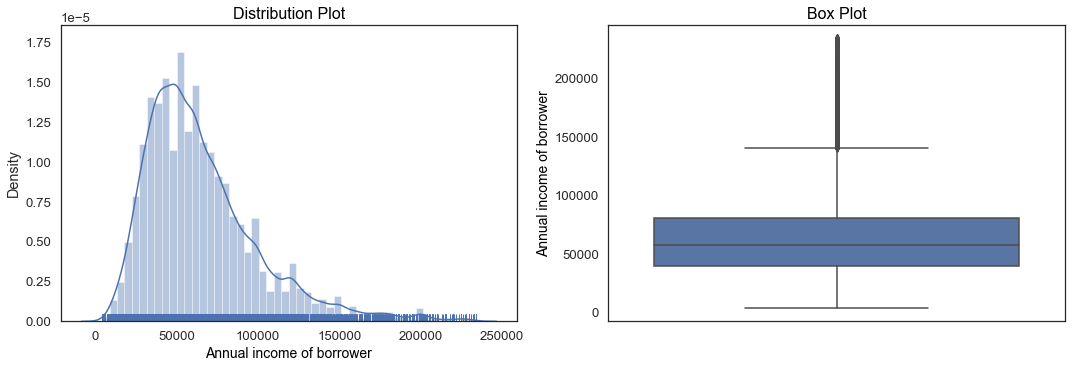

In [48]:
# Checking spread of values after removal of outliers.

sns.set(font_scale= 1.2)
plt.figure(figsize=(18,12),facecolor='white')
sns.set_style("white")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df_01['annual_inc'],rug = True)
ax.set_title('Distribution Plot',fontsize=16,color='black')
ax.set_xlabel('Annual income of borrower',fontsize=14,color='black')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df_01['annual_inc'])
ax.set_title('Box Plot',fontsize=16,color='black')
ax.set_ylabel('Annual income of borrower',fontsize=14,color='black')
plt.show()

Now data looks much better to find some conclusions through it.

#### Observation :-
1.) The average income of borrower, ranges between 40,000 - 80,000.

2.) A some borrower had income more than 1,50,000 which ranges to 2,34,000 by which we seen the high values in total payment on loan.

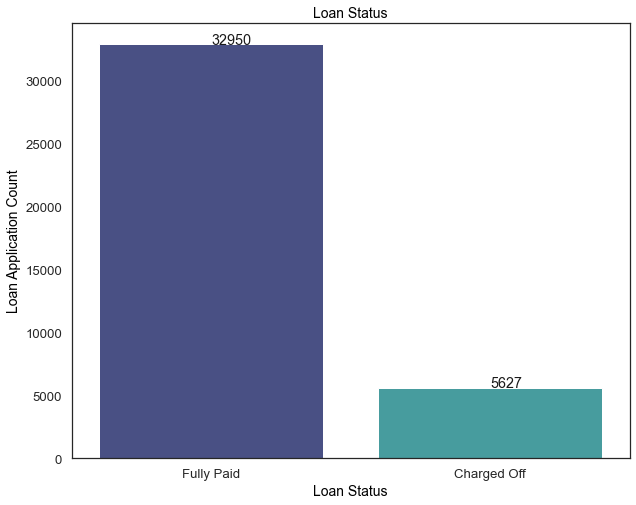

In [49]:
# Loan Status (Unordered Categorical Variable)  

plt.figure(figsize=(10,8),facecolor='white')
sns.set_style("white")
ax = sns.countplot(x="loan_status",data=df,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='black')
ax.set_xlabel('Loan Status',fontsize=14,color = 'black')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'black')            
# To show count of values above bars
s=df['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')
    
# Below plot shows that close to 15% loans were charged off out of total loan issued.

In [50]:
# Column "loan status" 
# this can give us actual overall status on loan taken by people from the company.
(round((df.loan_status.value_counts()*100)/len(df)))

Fully Paid    85.00
Charged Off   15.00
Name: loan_status, dtype: float64

#### Observation are :-

1) 85% (approx.) loans were labled as *fully paid*.

2) 15% (approx.) loans were labled as *charged off*.

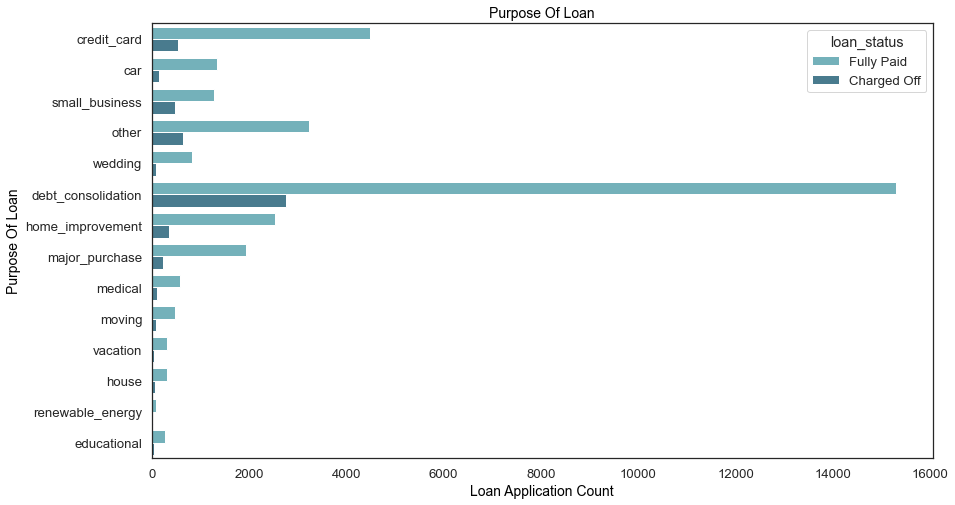

In [51]:
# Purpose Of Loan (Unordered Categorical Variables)

plt.figure(figsize=(14,8),facecolor='white')
sns.set_style("white")
ax = sns.countplot(y="purpose",data=df,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='black')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'black')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'black')      
plt.show()

#### Observations :
1.) Below plot shows that most of the loans were taken for the purpose of debt consolidation, paying credit card bill , home improvement & others.

2.) Number of chraged off count also high for these loans.

3.) Debt consolidation has the highest amount of charged off count compare to others.

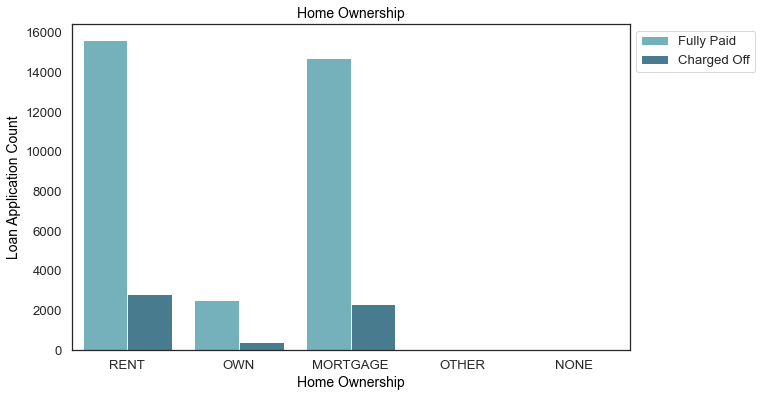

In [52]:
# Home Ownership (Unordered Categorical Variables)

plt.figure(figsize=(10,6),facecolor='white')
ax = sns.countplot(x="home_ownership",data=df,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='black')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'black')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'black')      
plt.show()

#### Observation :
1.) Most of borowwers, who living in rented home or who mortgazed their home have higher count of charged off.

2.) Applicant numbers from these categories are higher so charged off is also high.

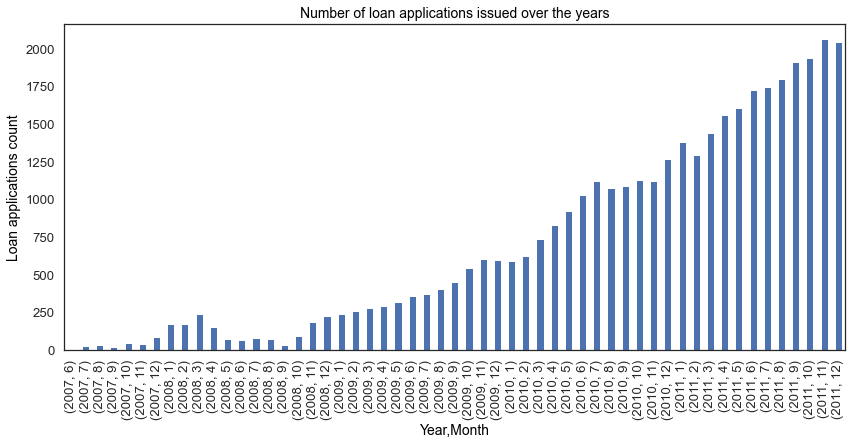

In [53]:
# Derived Column  (Ordered Categorical Variable)

# With this variable, we looked into number of loans which were approved every year or month.
# We use derived column year to check pattern of loan issuing over the years.

plt.figure(figsize=(14,6),facecolor='white')
df.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count',fontsize=14,color='black')
plt.xlabel('Year,Month',fontsize=14,color = 'black')      
plt.title("Number of loan applications issued over the years",fontsize=14,color='black')
plt.show()

#### Observation :-

1.) The count of loan application is increasing every passing month and year.

2.) Therefore, increase in number of loan applications are adding more to number of charged off applications.

3.) Number of loans issued in 2008 ( May-October) got dipped, may be due to Recession.

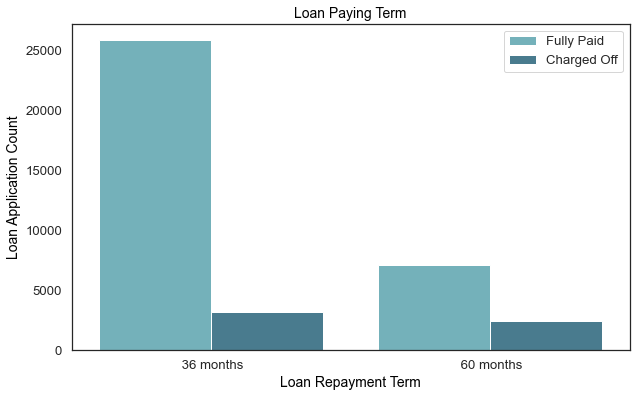

In [54]:
# Terms for Loan Paying (Ordered Categorical Variables)  

plt.figure(figsize=(10,6),facecolor='white')
ax = sns.countplot(x="term",data=df,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='black')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'black')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'black')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Observation :-
1.) Those who had taken loan to repay in 36 months had slightly more number of applicants getting charged off as compared to applicants who had taken loan for 60 months.

### Bivariate Analysis : Part 1

In [55]:
#### Bivariate Analysis : 

# In this part of analysis, we tried to analyze the loan status against some important columns which might co-relate with
# charged off of loans and then tried to find proportion of charged offs in those categories.

# To calculate the proportion of charged off loans, we did following :

# Grouped loans with different variables and loan status, get the count,use [.unstack()] to return a DataFrame.
# Since we used this for further analysis, it will be helpful to use [.reset_index()] to clean up the index. 
# Assign the new Data_Frame to a variable.
# Created a 'derived column' that sums charged off and fully paid loans for each category.
# then Divided the number of charged off loans by the total number of loans to get the proportion of charged off loans. 
# Store this in another derived column.
# Finally, took output of the whole table, sorted by proportion of charged off in each category issued loans.

#### Derived columns

In [56]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
df['loan_amnt_slabs'] = pd.cut(df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
df['annual_inc_slabs'] = pd.cut(df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
df['int_rate_slabs'] = pd.cut(df['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-12.5', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
df['dti_slabs'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])


In [57]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = df.groupby(['annual_inc_slabs', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Charged_off_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Charged_off_Proportion', ascending=False)

loan_status,annual_inc_slabs,Charged Off,Fully Paid,Total,Charged_off_Proportion
0,0-20000,237,943,1180,0.20
1,20000-40000,1514,7004,8518,0.18
2,40000-60000,1729,9534,11263,0.15
3,60000-80000,1024,6597,7621,0.13
4,80000 +,1122,8859,9981,0.11


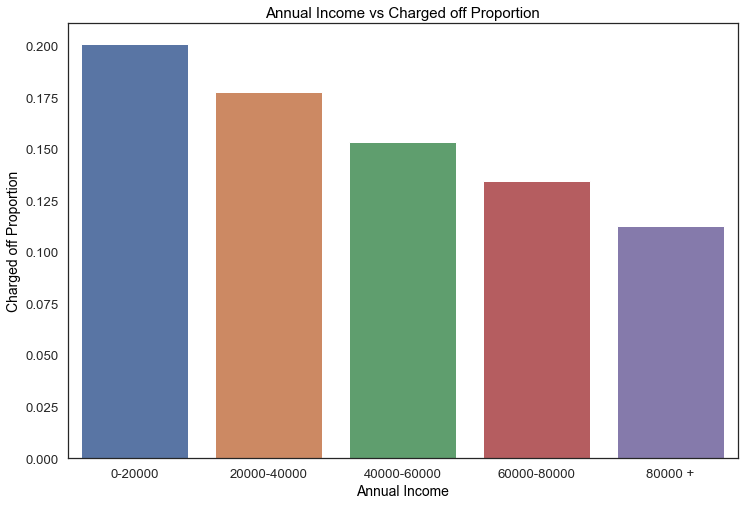

In [58]:
# plotting bar plot on data calculated above, to visualize the pattern and to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='white')
ax1.set_title('Annual Income vs Charged off Proportion',fontsize=15,color = 'black')
ax1=sns.barplot(x='annual_inc_slabs', y='Charged_off_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Charged off Proportion',fontsize=14,color = 'black')
ax1.set_xlabel('Annual Income',fontsize=14,color='black')
plt.show()

#### Observation :-
1.) Income range 80000+  has least chances of charged off.

2.) Income range 0-20000 has highest chances of charged off.

3.) One more thing to be Notice was that, with increase in annual income, charged off proportionally got decreased. 

In [59]:
# Bivariate Analysis on purpose of Loan against Charged off Proportion.

purpose_vs_loan = df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,475,1279,1754,0.27
10,renewable_energy,19,83,102,0.19
3,educational,56,269,325,0.17
9,other,633,3232,3865,0.16
5,house,59,308,367,0.16
8,moving,92,484,576,0.16
7,medical,106,575,681,0.16
2,debt_consolidation,2767,15288,18055,0.15
12,vacation,53,322,375,0.14
4,home_improvement,347,2528,2875,0.12


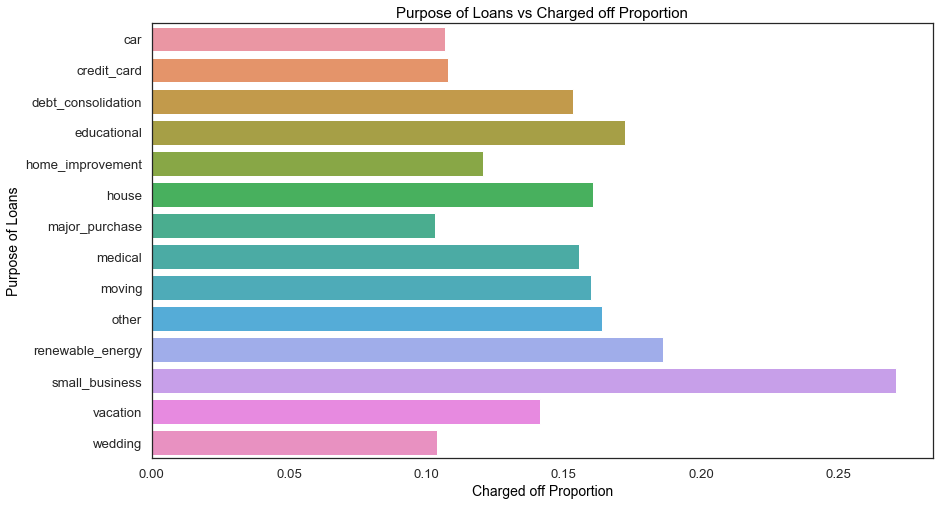

In [60]:
# plotting bar plot on data calculated above to visualize the pattern and to understand the data better.

# pairs of continuous variables.
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='white')
ax1.set_title('Purpose of Loans vs Charged off Proportion',fontsize=15,color = 'black')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='black')
ax1.set_xlabel('Charged off Proportion',fontsize=14,color = 'black')
plt.show()

#### Observation (Things which were hidden were) :-

1.) Small Business applicants have high chnaces of getting charged off.

2.) Where renewable_energy's chanrged off proportion was also more as compare to other categories.

In [61]:
# Bivariate Analysis on grade against Charged off Proportion

grade_vs_loan = df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,101,198,299,0.34
5,F,319,657,976,0.33
4,E,715,1948,2663,0.27
3,D,1118,3967,5085,0.22
2,C,1347,6487,7834,0.17
1,B,1425,10250,11675,0.12
0,A,602,9443,10045,0.06


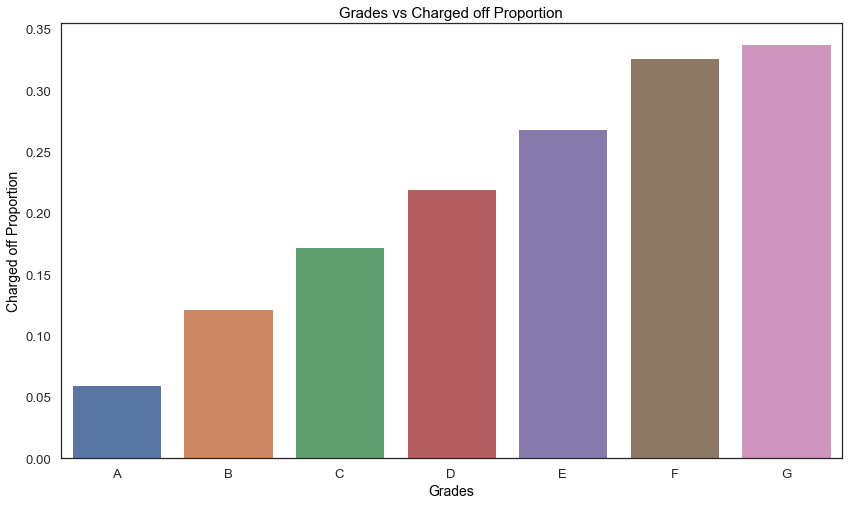

In [62]:
# Plotting bar plot on data calculated above to visualize the pattern and to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='white')
ax1.set_title('Grades vs Charged off Proportion',fontsize=15,color='black')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='black')
ax1.set_ylabel('Charged off Proportion',fontsize=14,color ='black')
plt.show()

#### Observation :-
1.) Grade "A" has least chances of charged off.

2.) Weather, Grade "F" and "G" have highest chances of charged off.

3.) therefore, Chances of charged off increases with grade as we go from "A" to "G"

In [63]:
# Understanding grades better

# Bivariate Analysis on sub grade against Charged off Proportion

grade_vs_loan = df.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,sub_grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
29,F5,54,59,113,0.48
32,G3,19,26,45,0.42
31,G2,28,49,77,0.36
28,F4,53,98,151,0.35
34,G5,10,19,29,0.34
30,G1,31,63,94,0.33
26,F2,70,163,233,0.30
25,F1,91,214,305,0.30
23,E4,126,298,424,0.30
27,F3,51,123,174,0.29


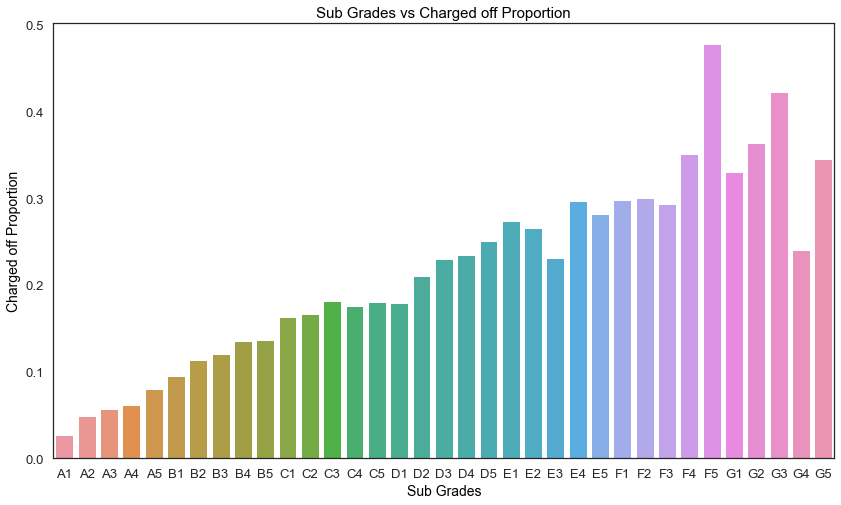

In [64]:
# plotting bar plots on data calculated above to visualize the pattern and to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='white')
ax1.set_title('Sub Grades vs Charged off Proportion',fontsize=15,color='black')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='black')
ax1.set_ylabel('Charged off Proportion',fontsize=14,color = 'black')
plt.show()

#### Observation :-
1.) Sub Grades of "A" has very less chances of charged off.

2.) Sub Grades of "F" and "G" have very high chances of charged off. In which "F5","G3","G2" & "F4" are the main highlights.

3.) Proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

In [65]:
# Bivariate Analysis on interest rate against Charged off Proportion

interest_vs_loan = df.groupby(['int_rate_slabs', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

loan_status,int_rate_slabs,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1266,3372,4638,0.27
2,12.5-16,2003,9470,11473,0.17
1,10-12.5,1232,8148,9380,0.13
0,0-10,830,11486,12316,0.07


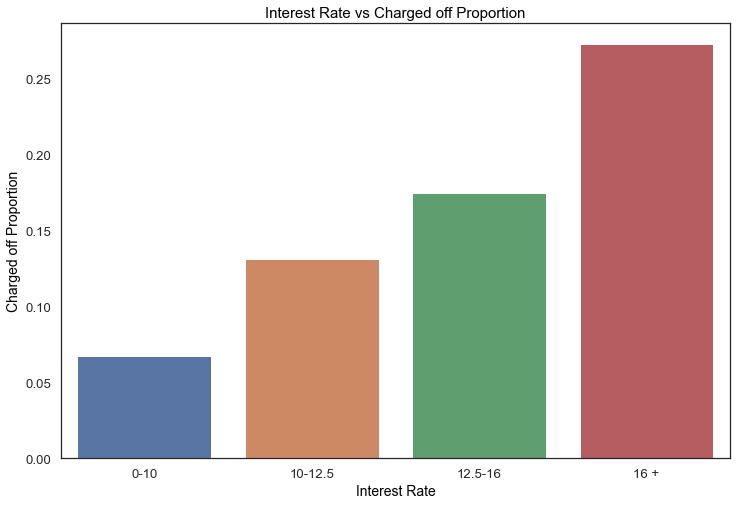

In [66]:
# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='white')
ax1.set_title('Interest Rate vs Charged off Proportion',fontsize=15,color='black')
ax1=sns.barplot(x='int_rate_slabs', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='black')
ax1.set_ylabel('Charged off Proportion',fontsize=14,color = 'black')
plt.show()

#### Observation :-

1.) Interest rate less than 10% has least chances of charged off. Intrest rates are starting from minimin 5 %.

2.) Interest rate more than 16% has highest chnaces of charged off as compared to other slabs of intrest rates.

Therefore, **Charged off proportion increasing with increase in intrest rates.**

In [67]:
# Bivariate Analysis on employment length against Charged off Proportion

emplen_vs_loan = df.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0,228,805,1033,0.22
10,10,1331,7157,8488,0.16
7,7,263,1448,1711,0.15
5,5,458,2736,3194,0.14
1,1,1095,6582,7677,0.14
6,6,307,1861,2168,0.14
8,8,203,1232,1435,0.14
3,3,555,3457,4012,0.14
4,4,462,2880,3342,0.14
2,2,567,3724,4291,0.13


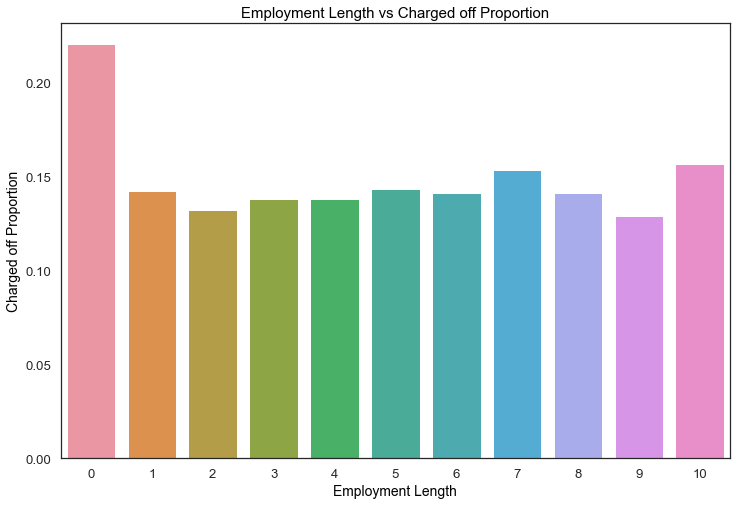

In [68]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='white')
ax1.set_title('Employment Length vs Charged off Proportion',fontsize=15,color='black')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='black')
ax1.set_ylabel('Charged off Proportion',fontsize=14,color = 'black')
plt.show()

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

#### Observation :-
1.) Those who are not working or have less than 1 year of work experience have highest chances of getting charged off.

2.) Rest of the applicants have more or less but similar chnaces of getting charged off.

therefore, **As borrowers who have less or no experience, don't have sources to repay loan and tends to charged off.**



In [69]:
# Bivariate Analysis on address state against Chargedoff_Proportion

state_vs_loan = df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.00,2.00,5.00,0.60
32,NV,108.00,371.00,479.00,0.23
40,SD,12.00,50.00,62.00,0.19
0,AK,15.00,63.00,78.00,0.19
9,FL,504.00,2277.00,2781.00,0.18
24,MO,114.00,556.00,670.00,0.17
11,HI,28.00,138.00,166.00,0.17
13,ID,1.00,5.00,6.00,0.17
31,NM,30.00,153.00,183.00,0.16
36,OR,71.00,364.00,435.00,0.16


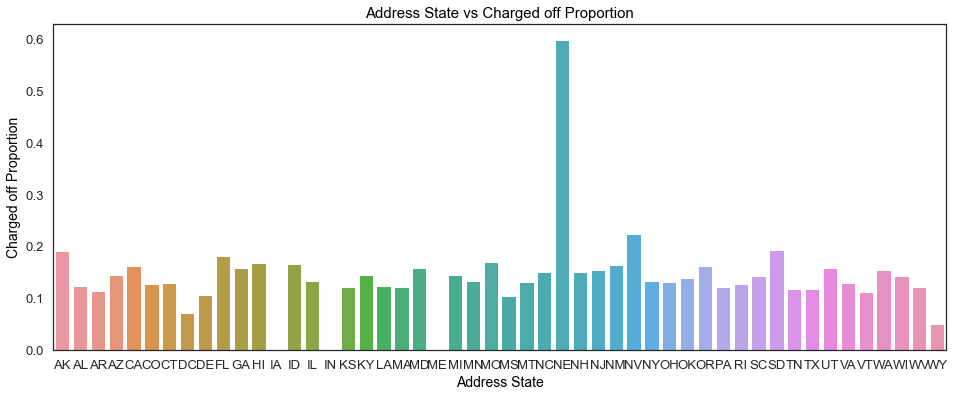

In [70]:
# Plotting bar plot on data calculated above to visualize the pattern and to understand the data better.

fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='white')
ax1.set_title('Address State vs Charged off Proportion',fontsize=15,color='black')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_vs_loan)
ax1.set_xlabel('Address State',fontsize=14,color='black')
ax1.set_ylabel('Charged off Proportion',fontsize=14,color = 'black')
plt.show()

#### Observation :-
1.) state "NE" has highest chances of charged off but number of applications are too low to make any decisions.

2.) "NV,CA and FL" states shows good counts on charged offs with good number of applications.

In [71]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = df.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,Verified,2051,10155,12206,0.17
1,Source Verified,1434,8243,9677,0.15
0,Not Verified,2142,14552,16694,0.13


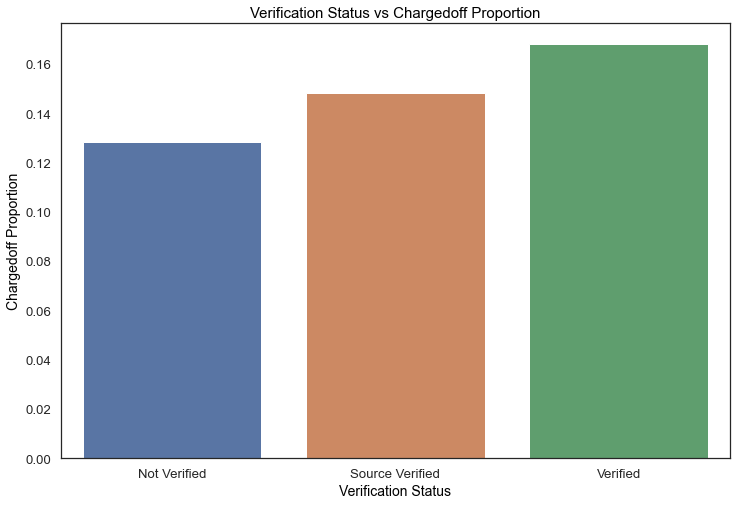

In [72]:
# Plotting bar plot on data calculated above to visualize the pattern and to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='white')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='black')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='black')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'black')
plt.show()

#### Observation :-
1.) There is no vast difference in charged off proportion in all cetegories.

2.) This variable doesn't provide any data for charged off.

In [73]:
# Bivariate Analysis on pub_rec_bankruptcies against Charged off Proportion

bankruptcies_vs_loan = df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2.00,2,3,5,0.40
1,1.00,366,1271,1637,0.22
3,Unknown,118,579,697,0.17
0,0.00,5141,31097,36238,0.14


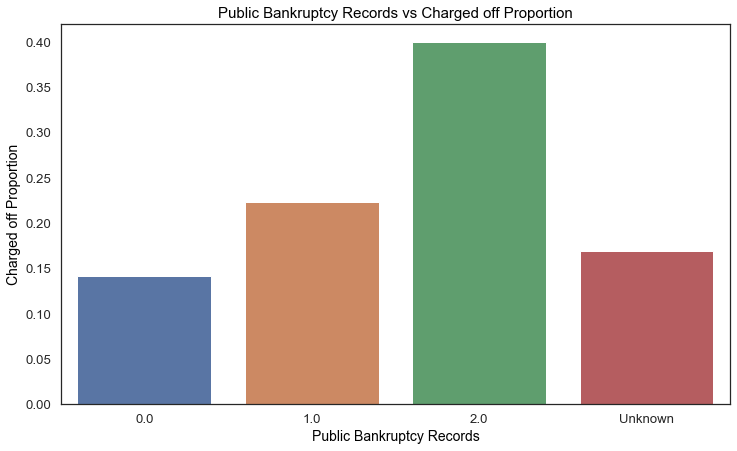

In [74]:
# Plotting bar plots on data calculated above to visualize the pattern & to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='white')
ax1.set_title('Public Bankruptcy Records vs Charged off Proportion',fontsize=15,color='black')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='black')
ax1.set_ylabel('Charged off Proportion',fontsize=14,color = 'black')
plt.show()

#### Observation :-
1.) Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.

2.) pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are too less to decide.

3.) Unknown is the column for which we don't have any information about borrower's rec_bankruptcies.

so, as per what we have other than Unknown, who has defaulted before has more chances of dafaulting in future as well.

In [75]:
# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

bankruptcies_vs_loan = df.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,1,457.00,1556.00,2013.00,0.23
2,2,10.00,38.00,48.00,0.21
0,0,5160.00,31347.00,36507.00,0.14
3,3,0.00,7.00,7.00,0.00
4,4,0.00,2.00,2.00,0.00


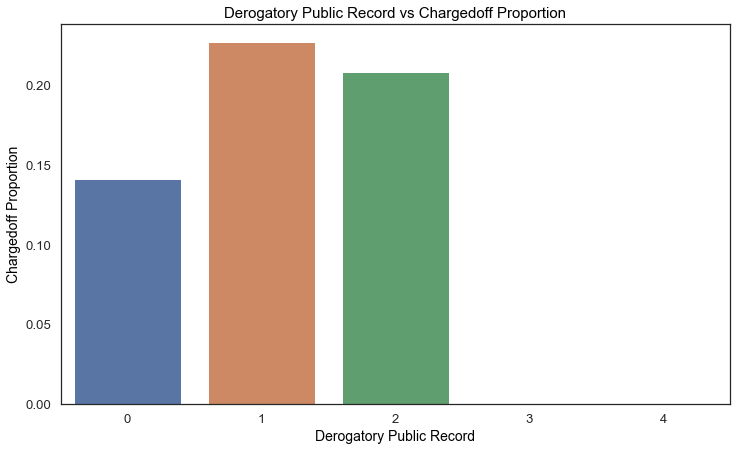

In [76]:
# plotting bar plots on data calculated above to visualize the pattern and to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='white')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='black')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='black')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'black')
plt.show()

#### Observations:
1.) A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts your ability to qualify for credit or other services. Public records and collections are derogatory items because they reflect financial obligations that were not paid as agreed.

2.) Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.

3.) pub_rec count 3-4 has less number of data, so cannot reach on any conclusions.

### Bivariate Analysis - Part 2

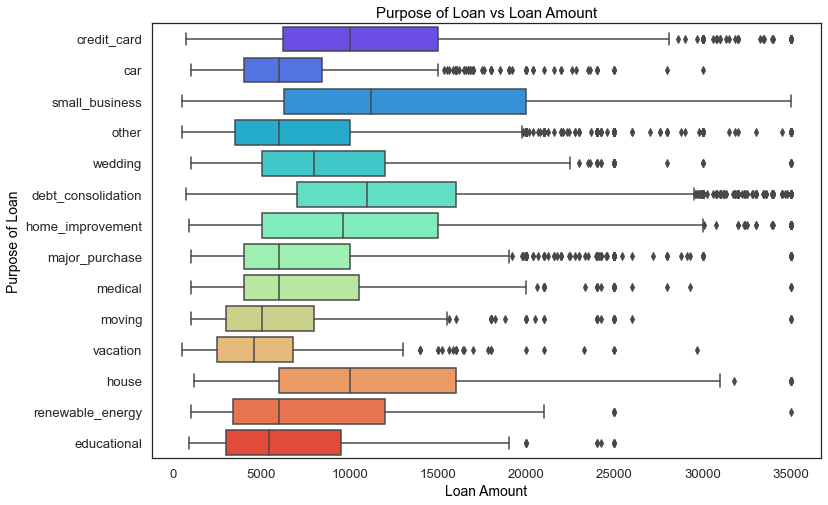

In [77]:
# Bivariate Analysis - Puprose of loan vs Loan amount

# Box Plot
plt.figure(figsize=(12,8),facecolor='white')
ax = sns.boxplot(y='purpose', x='loan_amnt', data = df, palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='black')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'black')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'black')
plt.show()

#### Observations:
1.) Median, 95th percentile & 75th percentile of loan amount are highest for loan taken for small business purpose among all purposes.

2.) Debt consolidation is second highest and Credit card is third highest.

<Figure size 2016x1152 with 0 Axes>

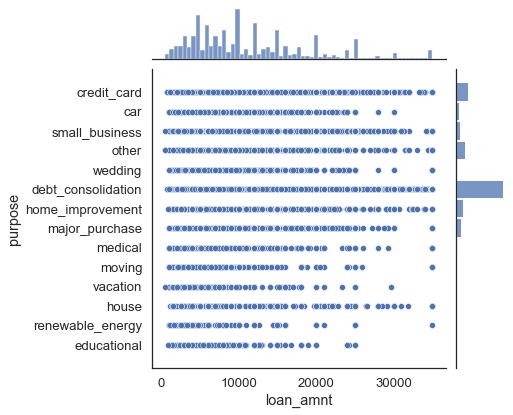

In [78]:
# Bivariate Analysis - Puprose of loan vs Loan amount

# Scatter Plot - It shows the distribution of quantitative data across several levels 
# of one (or more) categorical variables such that those distributions can be compared. 

plt.figure(figsize=(28,16),facecolor='white')
ax=sns.jointplot(y='purpose', x='loan_amnt', data = df);
plt.show();

#### Observation :-
1.) Loan taken for small business purpose, Debt consolidation and Credit card are evenly distributed as compare to loan taken for other purposes.

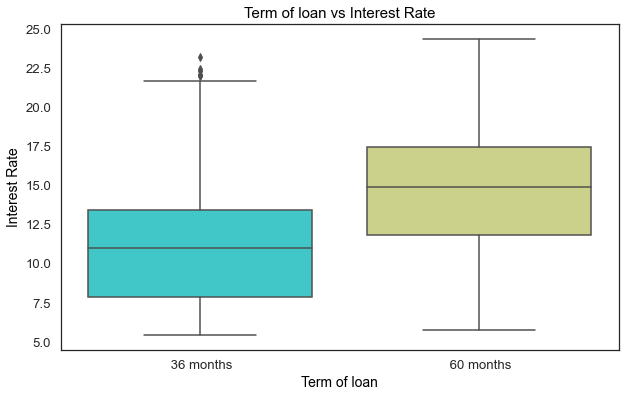

In [79]:
# Bivariate Analysis - Term of loan vs Interest Rate

# Box Plot
plt.figure(figsize=(10,6),facecolor='white')
ax = sns.boxplot(y='int_rate', x='term', data =df,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='black')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'black')
ax.set_xlabel('Term of loan',fontsize=14,color = 'black')
plt.show()

#### Observation :-
1.) It is clear that avearge intrest rate is higher for 60 months loan term.
2.) Most of the loans issued for longer term had higher intrest rates for repayement.

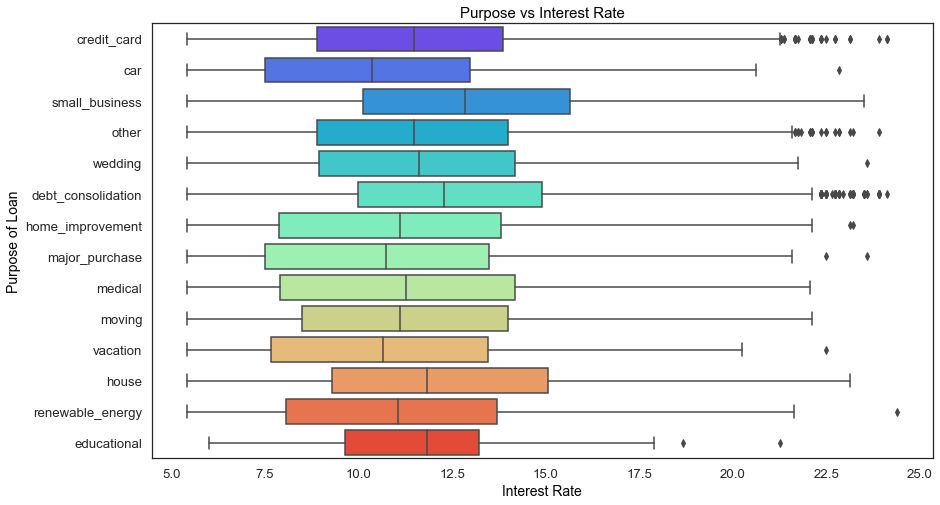

In [80]:
# Bivariate Analysis - Purpose vs Interest Rate

# Box Plot
plt.figure(figsize=(14,8),facecolor='white')
ax = sns.boxplot(x='int_rate', y='purpose', data =df, palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='black')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'black')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'black')
plt.show()

#### Observation :-
1.) It is clear that avearge intrest rate is highest for small business purpose.

2.) Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.

3.) Debt consolidation is 2nd where borrowers had to pay more interest rate.

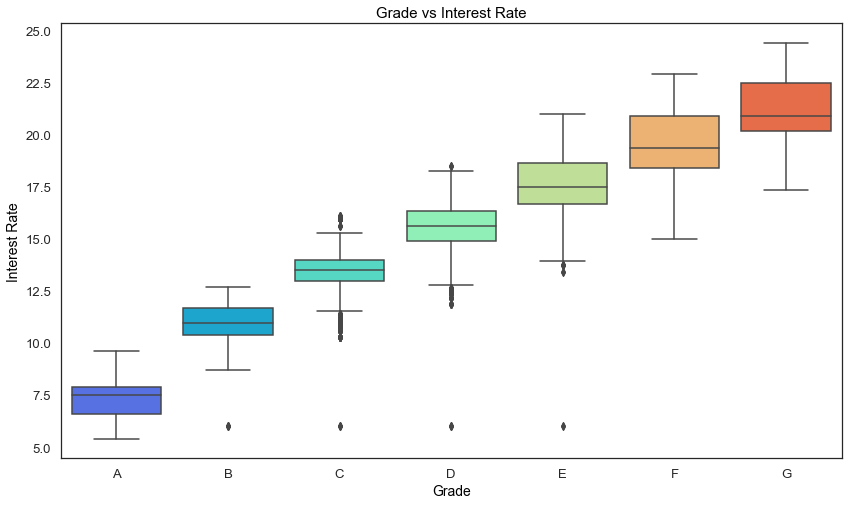

In [81]:
# Bivariate Analysis - Grade vs Interest Rate

# Box Plot
plt.figure(figsize=(14,8),facecolor='white')
ax = sns.boxplot(y='int_rate', x='grade', data = df, palette='rainbow', order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='black')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'black')
ax.set_xlabel('Grade',fontsize=14,color = 'black')
plt.show()

#### Observation :-
1.) A-grade is a top letter grade for a lender to assign to a borrower.

2.) The higher the borrower's credit grade, the lower the interest rate offered to that borrower on a loan.

3.) It is clear that intrest rate is increasing with grades moving from A to F.

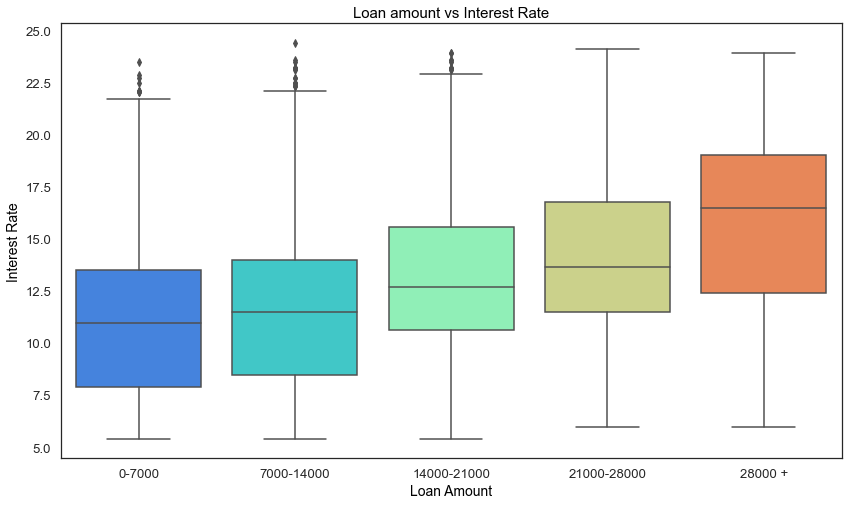

In [82]:
# Bivariate Analysis - Loan Amount vs Interest Rate

# Box Plot
plt.figure(figsize=(14,8),facecolor='white')
ax = sns.boxplot(y='int_rate', x='loan_amnt_slabs', data =df, palette='rainbow')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='black')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'black')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'black')
plt.show()

#### Observation :-
1.) It is clear that intrest rate is increasing with loan amount increase.

2.) Probably when loan amount is more, it is taken for longer loan term as we saw earlier that, longer the loan term more the interest rate.

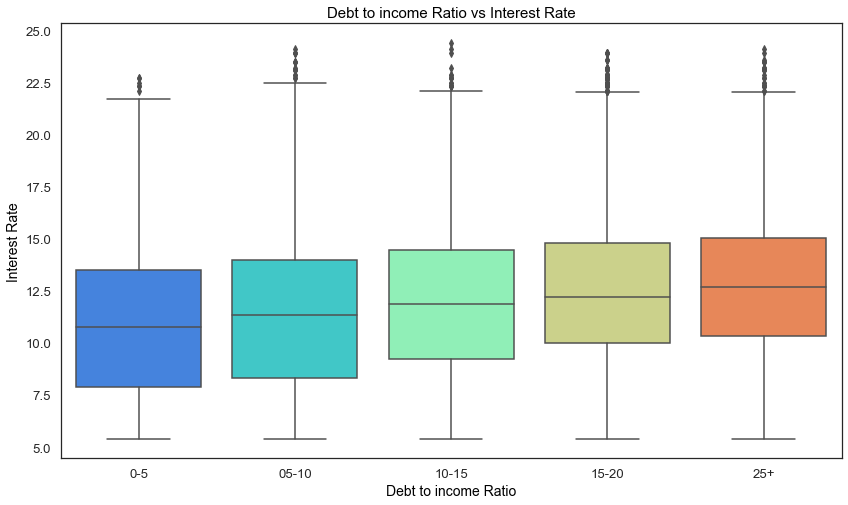

In [83]:
# Bivariate Analysis - dti vs Interest Rate

# Box Plot
plt.figure(figsize=(14,8),facecolor='white')
ax = sns.boxplot(y='int_rate', x='dti_slabs', data =df,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='black')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'black')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'black')
plt.show()

#### Observation :-
1.) Plot shows that, If your DTI is low enough you may get a lower interest rate.

2.) also Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

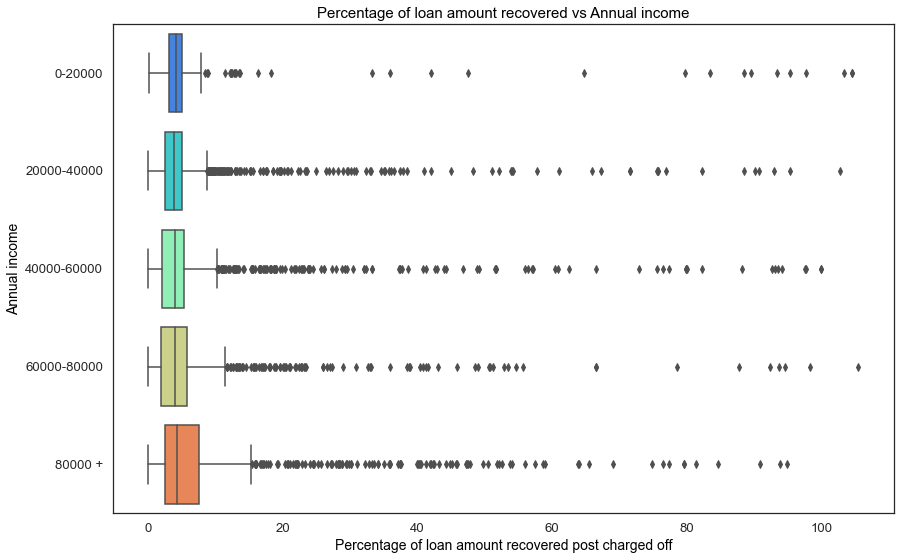

In [84]:
# Bivariate Analysis - Recoveries vs Annual income

# Box Plot
df['recoveries']=pd.to_numeric(df['recoveries'],errors='coerce')
loan_df_rec=df[df['recoveries'] > 0.00]

# calculate recovery percentage 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 

# plot
plt.figure(figsize=(14,9),facecolor='white')
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_slabs',data=loan_df_rec,palette='rainbow')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'black')
ax.set_ylabel('Annual income',fontsize=14,color = 'black')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'black')
plt.show()

#### Observation :-
1.) Higher percentage of loan amount recovered in case when borrower annual income is high.

2.) Plot shows no significant variation but there is slight increase in recovery percentage with increase in annual income.

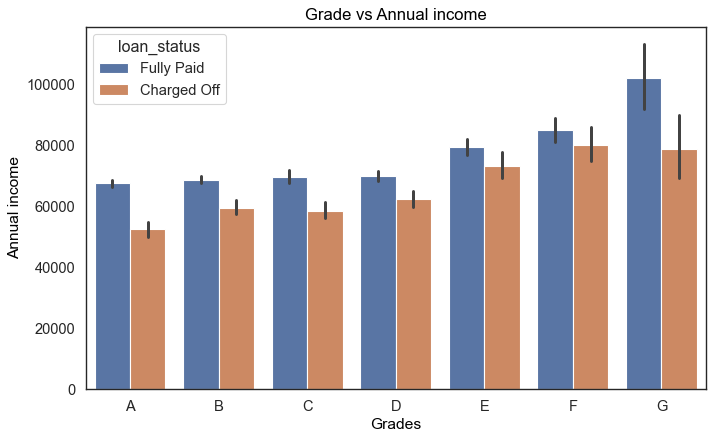

In [85]:
# Bivariate Analysis for Grade vs Annual Income 

# BarPlot to show variation of annual income across grade for every loan status.
plt.figure(figsize=(10,6), dpi=80, facecolor='white', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=df, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='black')
ax.set_ylabel('Annual income',fontsize=14,color = 'black')
ax.set_xlabel('Grades',fontsize=14,color = 'black')
plt.show()

#### Observation :-
From this we can conclude that, the ones getting 'charged off' have lower annual incomes than the ones who 'paid fully' for each and every grade (i.e. at same interest range)

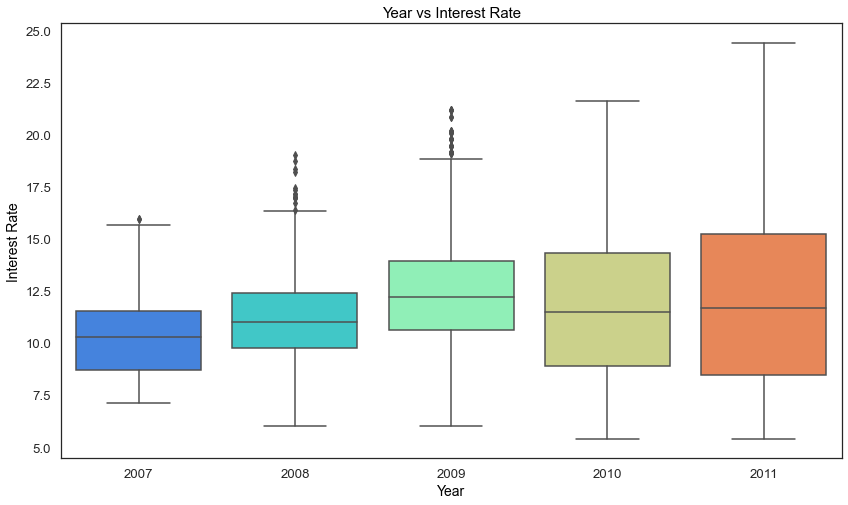

In [86]:
# Bivariate Analysis for year vs Interest Rate

# Box Plot
plt.figure(figsize=(14,8),facecolor='white')
ax = sns.boxplot(y='int_rate', x='year', data =df,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='black')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'black')
ax.set_xlabel('Year',fontsize=14,color = 'black')
plt.show()

#### Observation :-
Plot shows intrest rate is increasing slowly with every year.

### Multivariate Analysis - Pair Plots

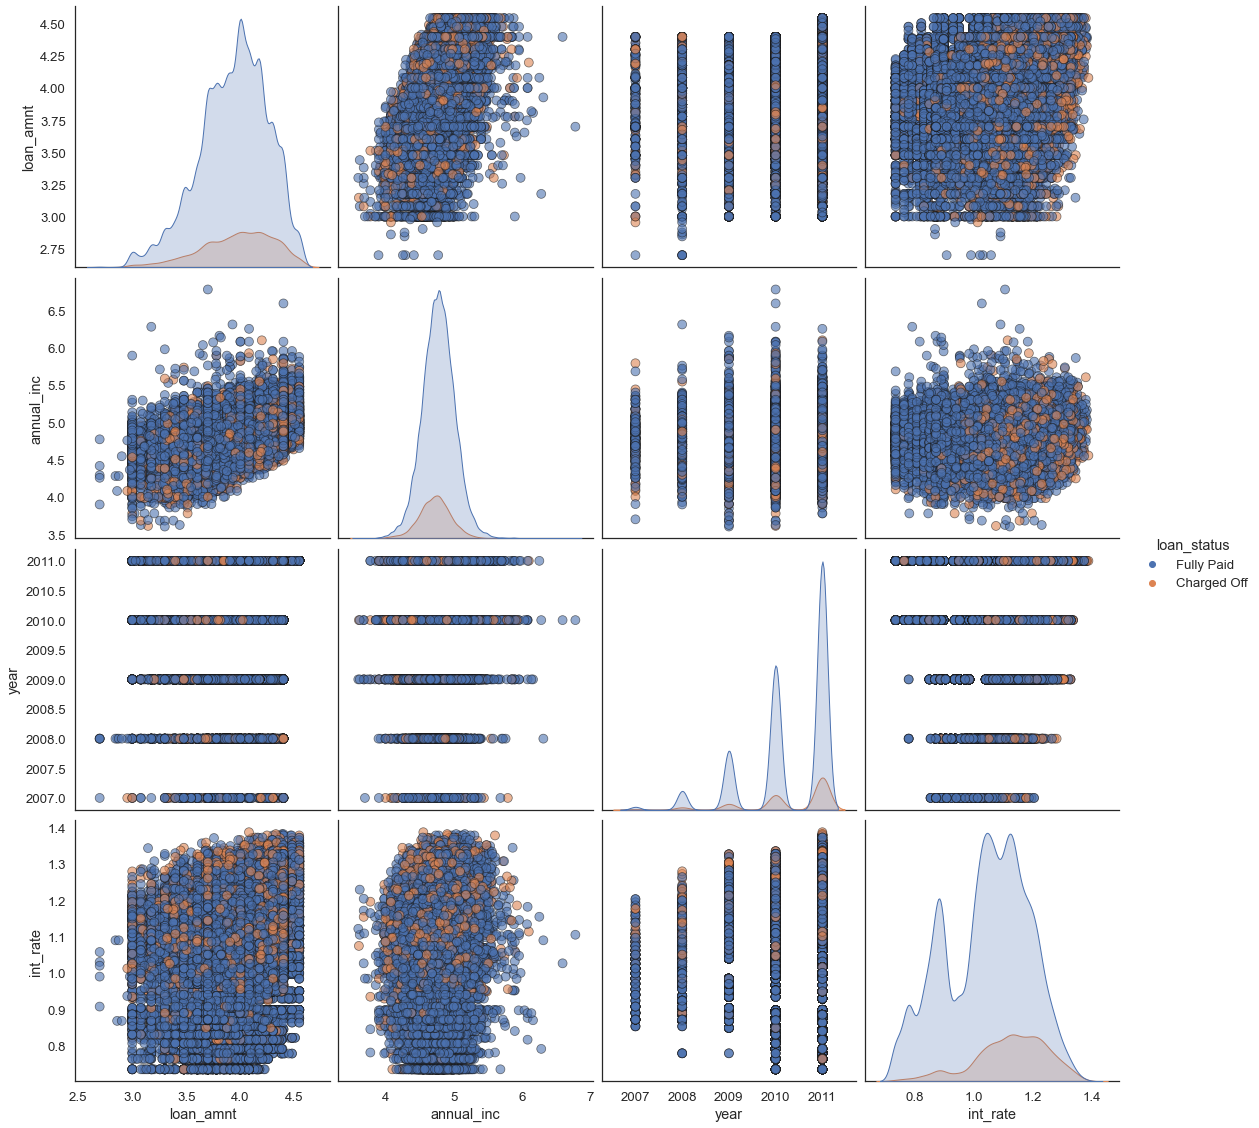

In [87]:
# Plotting a pair plot for multivariate analysis.

# Pick few imporatnt columns from dataset separately.
loan_pair = df[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

#### Observation :-
1.) Higher the intrest rate higher charged off ratio.

2.) Higher the annual income higher the loan amount, but slight increment.

3.) Increase in number of charged off with increase in year.

4.) Intrest rate is increasing with increment of loan amount.

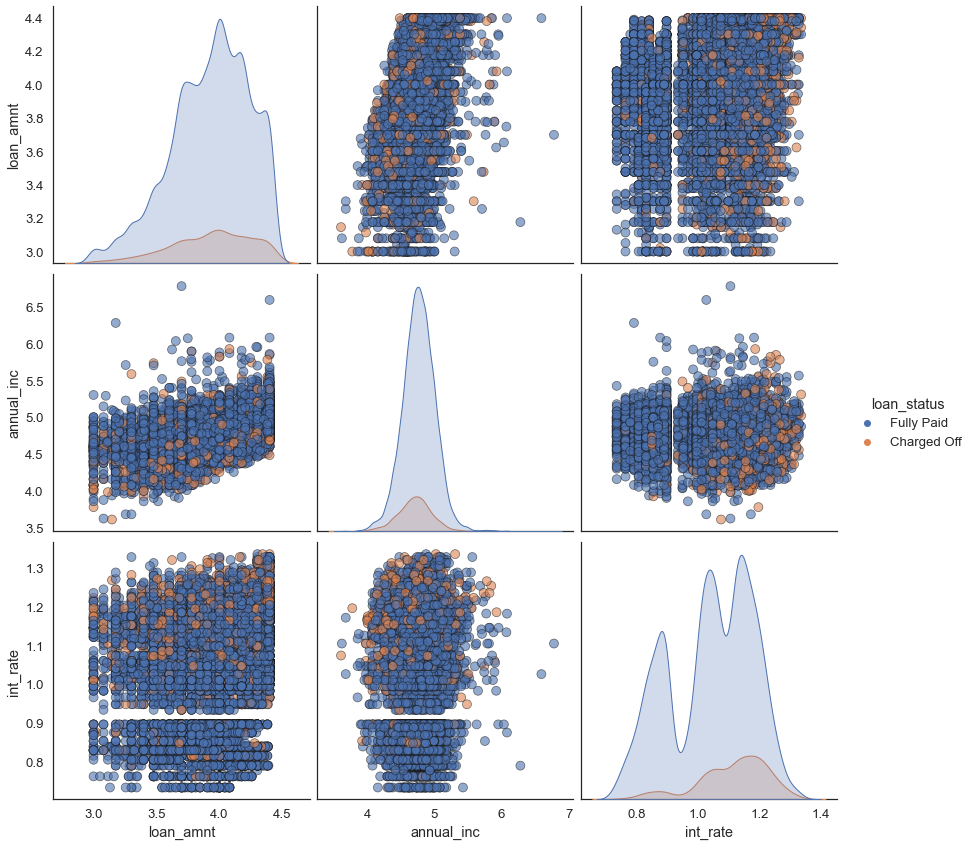

In [88]:
# Plotting a pair plot for multivariate analysis

# Picking few imporatnt columns from dataset separately.
# Above plot is too dense so just pick year 2010 for getting some insights.

sns.pairplot(loan_pair[loan_pair['year'] == 2010], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

#### Observation :-
1.) Higher the intrest rate higher charged off ratio.

2.) Higher the annual income higher the loan amount slightly.

3.) Intrest rate is increasing with loan amount increase this results in high charged off.